In [ ]:
import random
import csv
from math import sqrt

# Number of points to generate
num_points = 79

# Range of x and y values
x_min, x_max = -100, 100
y_min, y_max = -100, 100

# Minimum distance between any two points
min_distance = 20

# Generate random points
points = []

while len(points) < num_points:
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    valid_point = True
    for px, py in points:
        if sqrt((x - px)**2 + (y - py)**2) < min_distance:
            valid_point = False
            break
    if valid_point:
        points.append((x, y))

# Save points to CSV file
with open('points.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x', 'y'])
    for point in points:
        writer.writerow(point)

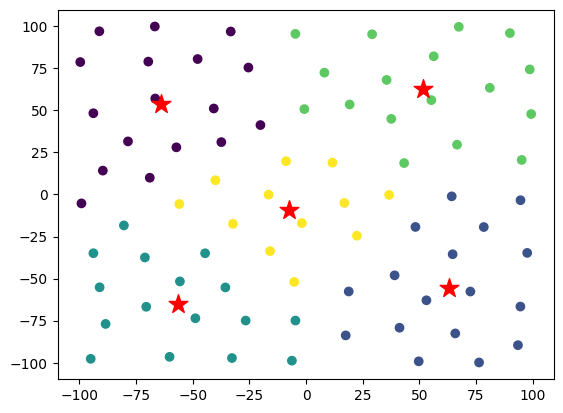

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Take input for number of UAVs
n=int(input())

# read data points
data = pd.read_csv('points.csv')
X = data[['x', 'y']]
# print(X)

# Fit KMeans model with n clusters for each UAV
kmeans = KMeans(n_clusters=n,n_init=12)
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Get the co-ordinates belonging to each cluster
cluster_data = []
for i in range(kmeans.n_clusters):
    cluster_data.append(X[kmeans.labels_ == i])

# Plot clusters
plt.scatter(X['x'], X['y'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=200, c='r')
plt.show()



Enter the average velocity of UAV: 6
Enter the propulsion power of UAV: 5
Enter the Transmission power of UAV : 4
Enter the data size of UAV : 3
range(0, 5)
Enter the maximum energy consumption: 5666789
Best solution: [6, 8, 11, 7, 12, 16, 0, 13, 3, 5, 14, 15, 2, 18, 9, 10, 1, 17, 4]
Distance: 838.4988532037979
Energy consumption: 838.4988532037979


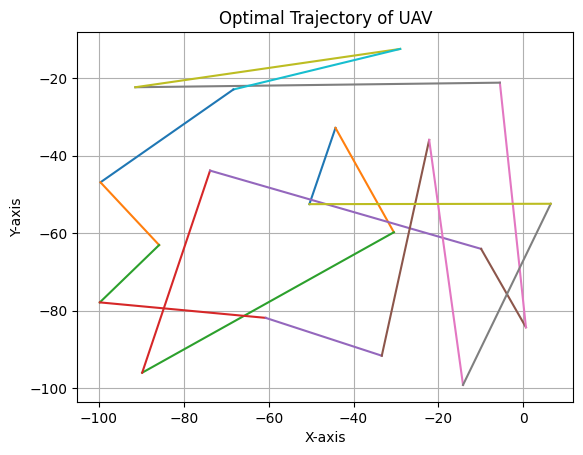

Enter the maximum energy consumption: 6677895
Best solution: [13, 10, 9, 11, 8, 7, 12, 6, 5, 2, 3, 0, 14, 15, 16, 4, 1]
Distance: 673.2574239390291
Energy consumption: 673.2574239390291


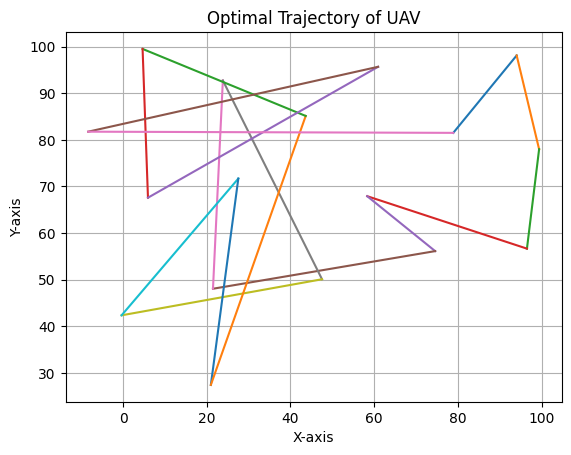

Enter the maximum energy consumption: 8743672
Best solution: [6, 5, 10, 9, 0, 2, 7, 3, 1, 8, 4]
Distance: 368.5164997507691
Energy consumption: 368.5164997507691


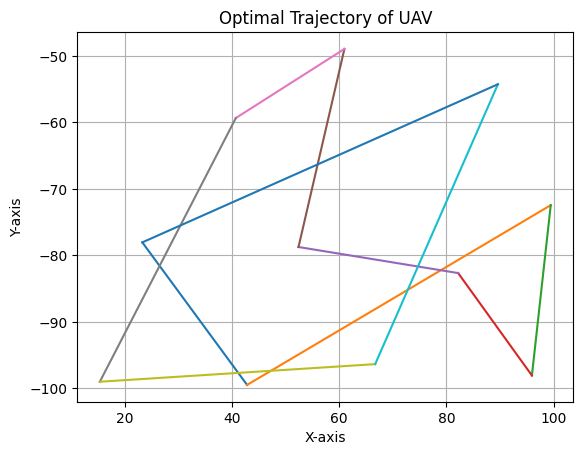

Enter the maximum energy consumption: 323211
Best solution: [5, 7, 2, 12, 11, 1, 16, 10, 15, 14, 3, 0, 13, 6, 17, 8, 9, 4]
Distance: 744.2479058987378
Energy consumption: 744.2479058987378


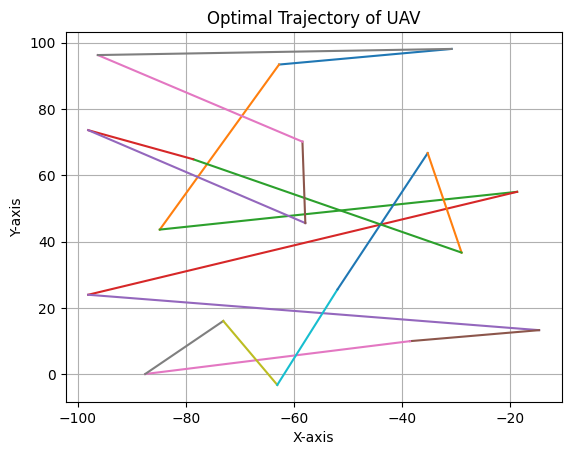

Enter the maximum energy consumption: 44
Mission aborted :), Returning to base station....
Best solution: [4, 1, 3, 11, 13, 8, 7, 0, 2, 9, 10, 12, 6, 5]
Distance: 0
Energy consumption: 0


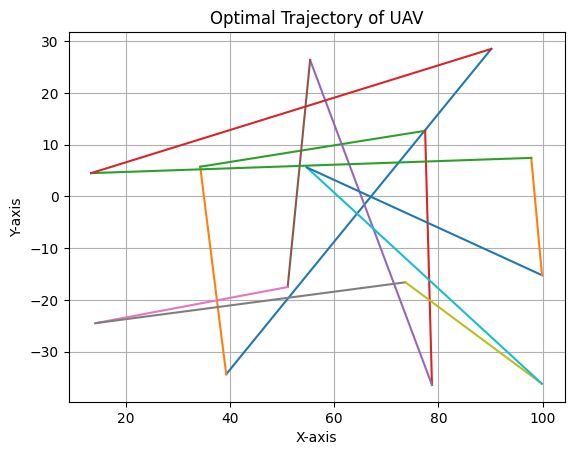

In [ ]:
import random

# Define the genetic algorithm parameters
population_size = 100 # Number of candidate solutions in each generation
mutation_rate = 0.1 # Probability of introducing new variations in the population
generations = 100 # Number of generations to run the algorithm

# In this implementation we assume that each UAV used has same average velocity, power and transmission energy.
avg_velocity = float(input("Enter the average velocity of UAV: "))
uav_power = float(input("Enter the propulsion power of UAV: "))
transmission_power = float(input("Enter the Transmission power of UAV : "))
data_size= float(input("Enter the data size of UAV : "))


# Define the evaluation function
def evaluate_solution(points,solution,threshold_energy):
    # Calculate the total distance, energy consumption, and number of covered points of the solution
    total_distance = 0
    total_energy = 0
    #list of covered points in the sub-area in this solution
    covered_points = 0
    for i in range(len(solution)-1):
        x1, y1 = points[solution[i]]
        x2, y2 = points[solution[i+1]]
        distance = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        transmission_energy= data_size*transmission_power
        energy = (distance*uav_power)/avg_velocity + transmission_energy # traversal energy consumption formula
        total_distance += distance
        total_energy += energy
        if total_energy <= threshold_energy:
            covered_points += 1    # add the target point if total enerygy is less that threshold
        else:
            break
    # Penalize the solution if the energy consumption exceeds the threshold
    if total_energy > threshold_energy:
        return 1e9,-1,covered_points
    else:
        return total_distance,total_energy,covered_points

def evaluate_solution1(points,solution,threshold_energy):
    # Calculate the total distance, energy consumption, and number of covered points of the solution
    total_distance = 0
    total_energy = threshold_energy
    x,y=[],[]
    y.append(threshold_energy)
    x.append(0)
    #list of covered points in the sub-area in this solution
    covered_points = 0
    time = 0
    for i in range(len(solution)-1):
        x1, y1 = points[solution[i]]
        x2, y2 = points[solution[i+1]]
        distance = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        transmission_energy= data_size*transmission_power
        energy = (distance*uav_power)/avg_velocity + transmission_energy # traversal energy consumption formula
        time += distance//avg_velocity
        total_distance += distance
        total_energy -= energy
        y.append(total_energy)
        time = (i+1)*5 + 5.345
        x.append(time)
        if total_energy >= 0:
            covered_points += 1    # add the target point if total enerygy is less that threshold
        else:
            break

    return x,y

# Define the genetic operators
def crossover(parent1, parent2):
    # Select a random subsequence from the first parent and copy it to the offspring
    start = random.randint(0, len(parent1)-1)
    end = random.randint(start, len(parent1)-1)
    offspring = parent1[start:end]
    # Add the remaining genes from the second parent to the offspring
    for gene in parent2:
        if gene not in offspring:
            offspring.append(gene)
    return offspring

def mutate(solution):
    # Swap two random genes in the solution
    index1 = random.randint(0, len(solution)-1)
    index2 = random.randint(0, len(solution)-1)
    solution[index1], solution[index2] = solution[index2], solution[index1]
    return solution

# Main program
# Finding optimal path for each UAV
for i in range(kmeans.n_clusters):
    threshold_energy = float(input("Enter the maximum energy consumption: ")) # input threshold energy for each UAV
    #list of target points in each cluster(sub area)
    points = []
    X_points=list(cluster_data[i]['x'])
    Y_points=list(cluster_data[i]['y'])
    for j in range(len(X_points)):
        points.append((X_points[j],Y_points[j]))
    n=len(points)

    # Initialize the population
    population = []
    for i in range(population_size):
        solution = list(range(len(points)))
        random.shuffle(solution)
        population.append(solution)

    # Run the genetic algorithm
    for generation in range(generations):
        # Evaluate the fitness of each solution
        fitness_scores = []
        for solution in population:
            fitness_scores.append(evaluate_solution(points, solution, threshold_energy)[0])
        # Select the best-performing solutions to create the next generation
        selected_population = []
        for i in range(population_size):
            parents = random.choices(population, weights=fitness_scores, k=2)
            parent1, parent2 = parents[0], parents[1]
            offspring = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                offspring = mutate(offspring)
            selected_population.append(offspring)
        population = selected_population

    # Find the best solution
    best_solution = None
    best_score = float('inf')
    for solution in population:
        score = evaluate_solution(points,solution,threshold_energy)[1]
        if score < best_score:
            best_solution = solution
            best_score = score
    Energy_consumption=evaluate_solution(points,best_solution,threshold_energy)[1]
    if Energy_consumption == -1:
        print("Mission aborted as energy is finished")
        print("maximum covered points:",evaluate_solution(points,best_solution,threshold_energy)[2])
    else:
        print("Best solution:", best_solution)
        print("Distance:", evaluate_solution(points,best_solution,threshold_energy)[0])
        print("Energy consumption:", evaluate_solution(points,best_solution,threshold_energy)[1])

        #plot the optimal path
        x,y=[],[]
        x.append((0))
        y.append((0))
        for i in best_solution:
            x.append(points[i][0])
            y.append(points[i][1])

        x.append(points[best_solution[0]][0])
        y.append(points[best_solution[0]][1])
        pairs = list(zip(x[:-1], y[:-1], x[1:], y[1:])) # create a list of adjacent point pairs

        for p in pairs:
            plt.plot([p[0], p[2]], [p[1], p[3]]) # plot the line connecting the pair of points
        plt.title('Optimal Path of UAV')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.grid(True)
        plt.show()

        xx,yy=evaluate_solution1(points,best_solution,threshold_energy)

        fig, ax = plt.subplots()
        # Plot the line graph
        ax.plot(xx, yy,color='red')

        # Add labels and title
        ax.set_xlabel('Time(in seconds)')
        ax.set_ylabel('Energy of UAV')
        ax.set_title('Variation of Energy of UAV during its journey')

        # Show the plot
        plt.show()

In [ ]:
import random

# Define the genetic algorithm parameters
population_size = 100 # Number of candidate solutions in each generation
mutation_rate = 0.1 # Probability of introducing new variations in the population
generations = 100 # Number of generations to run the algorithm

# In this implementation we assume that each UAV used has same average velocity, power and transmission energy.
avg_velocity = float(input("Enter the average velocity of UAV: "))
uav_power = float(input("Enter the propulsion power of UAV: "))
transmission_power = float(input("Enter the Transmission power of UAV : "))
data_size= float(input("Enter the data size of UAV : "))


# Define the evaluation function
def evaluate_solution(points,solution,threshold_energy):
    # Calculate the total distance, energy consumption, and number of covered points of the solution
    total_distance = 0
    total_energy = 0
    #list of covered points in the sub-area in this solution
    covered_points = 0
    for i in range(len(solution)-1):
        x1, y1 = points[solution[i]]
        x2, y2 = points[solution[i+1]]
        distance = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        transmission_energy= data_size*transmission_power
        energy = (distance*uav_power)/avg_velocity + transmission_energy # traversal energy consumption formula
        total_distance += distance
        total_energy += energy
        if total_energy <= threshold_energy:
            covered_points += 1    # add the target point if total enerygy is less that threshold
        else:
            break
    # Penalize the solution if the energy consumption exceeds the threshold
    if total_energy > threshold_energy:
        return 1e9,-1,covered_points
    else:
        return total_distance,total_energy,covered_points

# Define the genetic operators
def crossover(parent1, parent2):
    # Select a random subsequence from the first parent and copy it to the offspring
    start = random.randint(0, len(parent1)-1)
    end = random.randint(start, len(parent1)-1)
    offspring = parent1[start:end]
    # Add the remaining genes from the second parent to the offspring
    for gene in parent2:
        if gene not in offspring:
            offspring.append(gene)
    return offspring

def mutate(solution):
    # Swap two random genes in the solution
    index1 = random.randint(0, len(solution)-1)
    index2 = random.randint(0, len(solution)-1)
    solution[index1], solution[index2] = solution[index2], solution[index1]
    return solution

# Main program
# Finding optimal path for each UAV
for i in range(kmeans.n_clusters):
    threshold_energy = float(input("Enter the maximum energy consumption: ")) # input threshold energy for each UAV
    #list of target points in each cluster(sub area)
    points = []
    X_points=list(cluster_data[i]['x'])
    Y_points=list(cluster_data[i]['y'])
    for j in range(len(X_points)):
        points.append((X_points[j],Y_points[j]))
    n=len(points)

    # Initialize the population
    population = []
    for i in range(population_size):
        solution = list(range(len(points)))
        random.shuffle(solution)
        population.append(solution)

    # Run the genetic algorithm
    for generation in range(generations):
        # Evaluate the fitness of each solution
        fitness_scores = []
        for solution in population:
            fitness_scores.append(evaluate_solution(points, solution, threshold_energy)[0])
        # Select the best-performing solutions to create the next generation
        selected_population = []
        for i in range(population_size):
            parents = random.choices(population, weights=fitness_scores, k=2)
            parent1, parent2 = parents[0], parents[1]
            offspring = crossover(parent1, parent2)
            if random.random() < mutation_rate:
                offspring = mutate(offspring)
            selected_population.append(offspring)
        population = selected_population

    # Find the best solution
    best_solution = None
    best_score = float('inf')
    for solution in population:
        score = evaluate_solution(points,solution,threshold_energy)[0]
        if score < best_score:
            best_solution = solution
            best_score = score
    Energy_consumption=evaluate_solution(points,best_solution,threshold_energy)[1]
    if Energy_consumption == -1:
        print("Mission aborted as energy is finished")
        print("maximum covered points:",evaluate_solution(points,best_solution,threshold_energy)[2])
    else:
        print("Best solution:", best_solution)
        print("Distance:", evaluate_solution(points,best_solution,threshold_energy)[0])
        print("Energy consumption:", evaluate_solution(points,best_solution,threshold_energy)[1])

        #plot the optimal path
        x,y=[],[]
        x.append((0))
        y.append((0))
        for i in best_solution:
            x.append(points[i][0])
            y.append(points[i][1])

        x.append(points[best_solution[0]][0])
        y.append(points[best_solution[0]][1])
        pairs = list(zip(x[:-1], y[:-1], x[1:], y[1:])) # create a list of adjacent point pairs

        for p in pairs:
            plt.plot([p[0], p[2]], [p[1], p[3]]) # plot the line connecting the pair of points
        plt.title('Optimal Path of UAV')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.grid(True)
        plt.show()

